# Laboratorul 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

### Exercițiul 1
1. La laboratorul precedent ați implementat voi Transformata Fourier Discretă. Comparați timpul de execuție al implementarii voastre cu numpy.fft. Desenați un grafic cu timpii de execuție pentru dimensiunile vectorilor N ∈ {128, 256, 512, 1024, 2048, 4096, 8192}. Folosiți `time.time` pentru a calcula timpul de rulare iar la plot pentru axa Oy afișați ambii timpi pe scară logaritmică.

In [38]:
N = [128, 256, 512, 1024, 2048, 4096, 8192]

fft_times = []
dft_times = []

for n in N:
    x = np.random.rand(n)   # Generam un semnal aleator

    start = time.time()
    FFT = np.fft.fft(x)
    end = time.time()
    fft_times.append(end - start)

    start = time.time()
    DFT = np.zeros(n, dtype=complex) # Transformata Fourier a semnalului
    for i in range(n):
        for j in range(n):
            DFT[i] += x[j] * np.e ** (-2j * np.pi * i * j / n)

    end = time.time()
    dft_times.append(end - start)

In [7]:
# Salvam timpii in numpy arrays
np.save('fft_times.npy', fft_times, allow_pickle=True)
np.save('dft_times.npy', dft_times, allow_pickle=True)

In [39]:
N = [128, 256, 512, 1024, 2048, 4096, 8192]

fft_times = np.load('fft_times.npy')
dft_times = np.load('dft_times.npy')

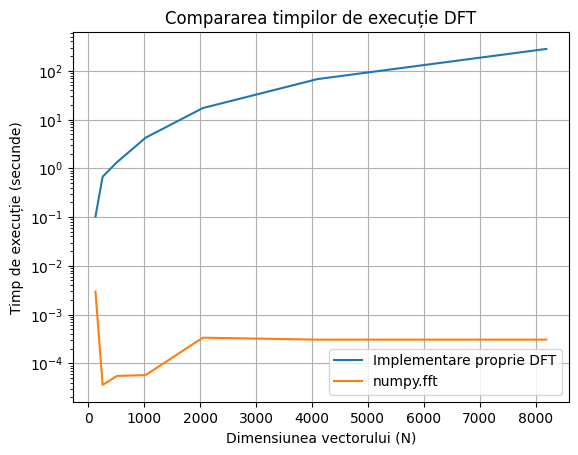

In [49]:
plt.figure()
plt.plot(N, dft_times, label='Implementare proprie DFT')
plt.plot(N, fft_times, label='numpy.fft')
# plt.xscale('log')   # Setam scala logaritmica pe axa x și y
plt.yscale('log')    
# plt.xticks(N, N)    # Scriem valorile pe axa x
plt.xlabel('Dimensiunea vectorului (N)')
plt.ylabel('Timp de execuție (secunde)')
plt.title('Compararea timpilor de execuție DFT')
plt.legend()
plt.grid(True)
plt.savefig('1.pdf')
plt.show()

### Exercițiul 2

2. Construiți un semnal sinusoidal de frecvență aleasă de voi, amplitudine unitară și fază nulă. Demonstrați (grafic) că eșantionarea lui cu o frecvență sub-Nyquist (aleasă, de asemenea, de voi) generează fenomenul de aliere. Pentru aceasta creați alte două semnale, de frecvențe diferite, care eșantionate cu frecvența aleasă mai sus produc aceleași eșantioane ca semnalul inițial. Obțineți, astfel, o figură similară Figurii 2.

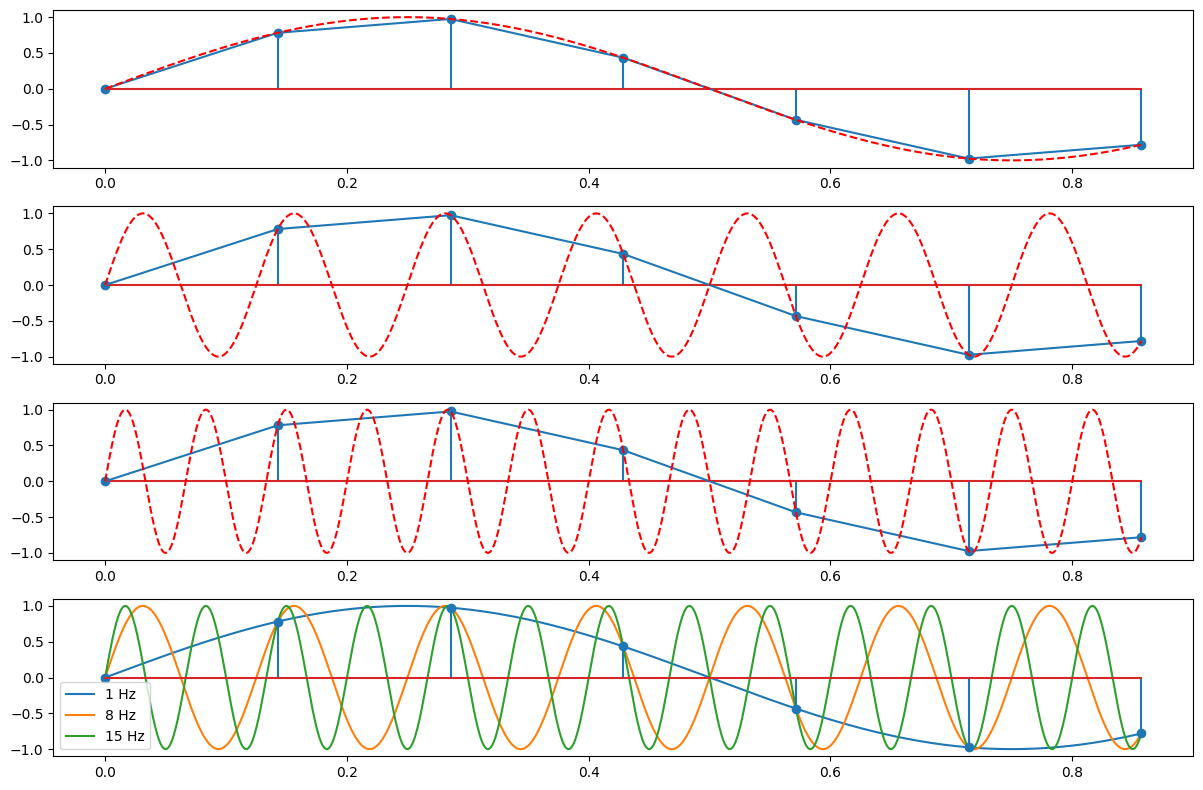

In [52]:
f0 = 1  # Frecvența semnalului 
fs = 7  # Frecvența de eșantionare sub Nyquist (2 * f0)
t = np.linspace(0, 1, fs, endpoint=False)
x = np.sin(2 * np.pi * f0 * t)

t_continuu = np.linspace(0, 1 - 1/fs, 1000)

k = [0, 1, 2]   # f0 + k * fs
fig, axs = plt.subplots(4, 1, figsize=(12, 8))

for i, ki in enumerate(k):
    fi = f0 + ki * fs
    semnal = np.sin(2 * np.pi * fi * t)
    semnal_continuu = np.sin(2 * np.pi * fi * t_continuu)

    axs[i].stem(t, semnal)
    axs[i].plot(t, semnal)
    axs[i].plot(t_continuu, semnal_continuu, 'r--')
    axs[3].plot(t_continuu, semnal_continuu, label=f'{f0 + ki * fs} Hz', color=f'C{i}')

axs[3].stem(t, x)
axs[3].legend()
plt.tight_layout()
plt.show()
fig.savefig('2.pdf')

### Exercițiul 3

3. Demonstrați (grafic) că alegând o frecvență de eșantionare mai mare decât frecvența Nyquist, nu mai obțineți fenomenul de aliere pentru semnalul ales la exercițiul precedent. La fel ca mai sus, indicați eșantioanele și pentru celelalte două semnale construite.

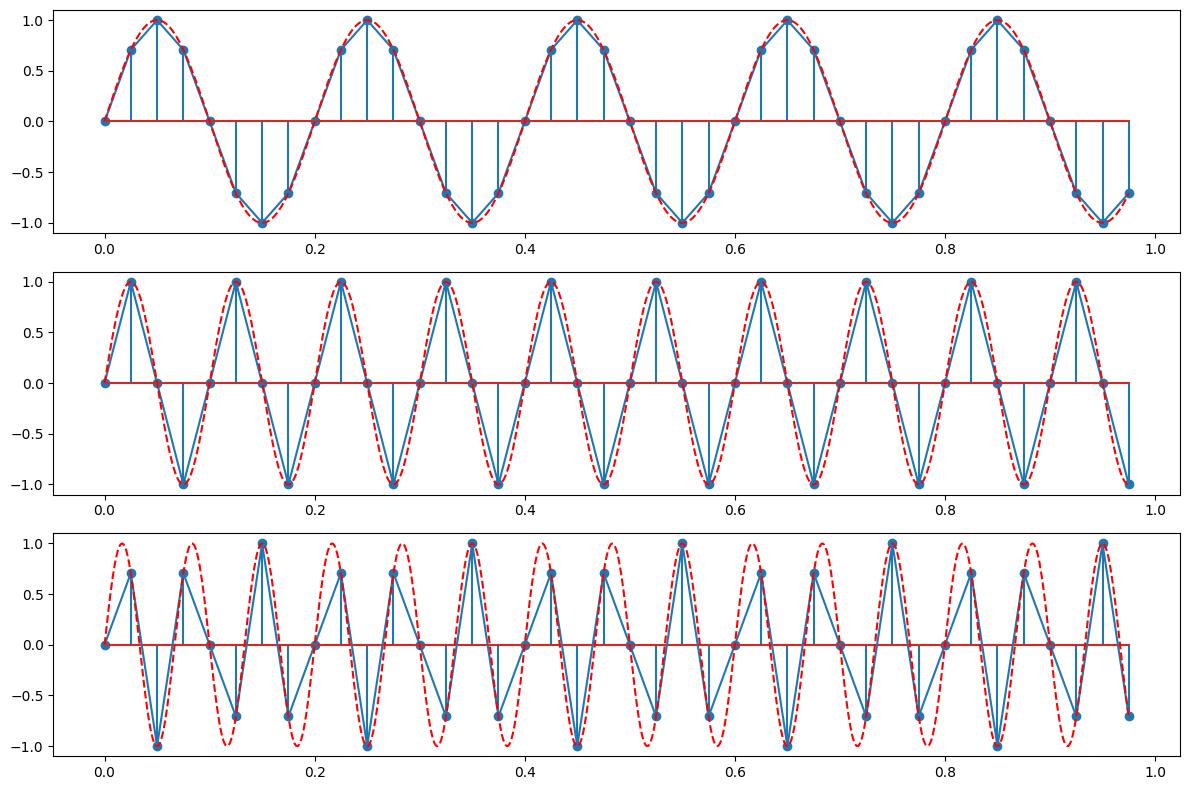

In [51]:
f0 = 5  # Frecvența semnalului 
fs = 40  # Frecvența de eșantionare peste Nyquist (2 * f_max)
# Daca alegem fs = 30Hz (unde f2 = 15Hz), atunci semnalul f2 este detectat ca fiind 0
t = np.linspace(0, 1, fs, endpoint=False)
x = np.cos(2 * np.pi * f0 * t)

t_continuu = np.linspace(0, 1 - 1/fs, 1000)

k = [0, 1, 2]   # f0 + k * fs
fig, axs = plt.subplots(3, 1, figsize=(12, 8))

for i, ki in enumerate(k):
    fi = f0 * ki + f0
    semnal = np.sin(2 * np.pi * fi * t)
    semnal_continuu = np.sin(2 * np.pi * fi * t_continuu)

    axs[i].stem(t, semnal)
    axs[i].plot(t, semnal)
    axs[i].plot(t_continuu, semnal_continuu, 'r--')


plt.tight_layout()
plt.show()
fig.savefig('3.pdf')

### Exercițiul 4

4. Frecvențele emise de un contrabas se încadrează între 40Hz și 200Hz. Care este frecvența minimă cu care trebuie eșantionat semnalul trece-bandă provenit din înregistrarea instrumentului, astfel încât semnalul discretizat să conțină toate componentele de frecvență pe care instrumentul le poate produce?

```
Frecvența minimă cu care trebuie eșantionat un astfel de semnal 
este de minim 2 * 200 = 400Hz.
```

### Exercițiul 5

5. Înregistrați-vă în timp ce spuneți, pe rând, vocalele "a, e, i, o, u" și deschideți fișierul in Audacity pentru a putea vedea spectograma. Puteți distinge diferitele vocale pe baza ei?

![image.png](5.spectograma.png)

```Se poate observa că puterea scade de-a lungul vocalelor```

### Exercițiul 6
6. Pentru vocalele înregistrate anterior desenați voi spectograma:

- a) citiți un semnal audio dintr-un fișier (un vector de dimensiune N);
- b) grupați câte 1% din valorile semnalului împreună astfel încât să fie și o suprapunere de 50% între grupuri;
- c) pentru fiecare grup creat astfel calculați FFT;
- d) puneți într-o matrice pe câte o coloană fiecare FFT calculat (cu valoarea absolută);
- e) afișați matricea într-o figură (similar cu Figura 1).

In [7]:
from scipy.io import wavfile   

# a) Citim semnalul audio
fs, signal = wavfile.read('vocale.wav')

In [ ]:
# b) Grupam semnalul in grupuri de 1% 
group_size = len(signal) // 100  # 1% din dimensiunea semnalului
overlap = group_size // 2  # Suprapunerea de 50%
groups = []

for i in range(0, len(signal), group_size - overlap):
    group = signal[i:i+group_size]
    groups.append(group)

In [26]:
# c) Calculam transformata Fourier a fiecarui grup
fft_groups = []

for group in groups:
    fft = np.fft.fft(group)
    fft_groups.append(np.abs(fft))

fft_groups = fft_groups[:-2]

In [27]:
# d) Punem valorile absolute ale FFT in matricea spectrograma
spectogram = np.column_stack(fft_groups)

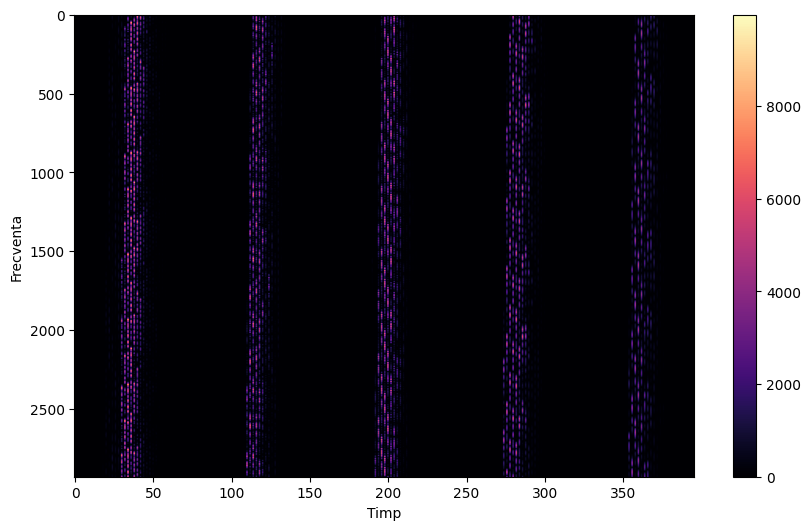

In [50]:
# e) Afisam spectograma
fig = plt.figure(figsize=(10, 6))
plt.imshow(spectogram, cmap='magma', aspect='auto')
plt.xlabel('Timp')
plt.ylabel('Frecventa')
plt.colorbar()
plt.show()
fig.savefig('6.pdf')

### Exercițiul 7

7. Puterea unui semnal este P_semnal = 90dB. Se cunoaște raportul semnal-zgomot, SNR_db = 80. Care este puterea zgomotului?

$$SNR_{\text{dB}} = 10 \cdot \log_{10}(SNR)$$

$$SNR = \frac{P_{semnal}}{P_{zgomot}}$$

### Rezolvare 

$$SNR_{dB} = 10 \cdot \log_{10}(\frac{P_{semnal}}{P_{zgomot}})$$
$$SNR_{dB} = 10 \cdot \log_{10}(P_{semnal}) - 10 \cdot \log_{10}(P_{zgomot})$$
$$SNR_{dB} = P_{semnal, dB} - P_{zgomot, dB} \Rightarrow$$
$$\Rightarrow P_{zgomot, dB} = P_{semnal, dB} - SNR_{dB} = 90dB - 80dB = 10dB$$

- [ref](https://en.wikipedia.org/wiki/Signal-to-noise_ratio)